In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import cgs as cgs
from plotting import plotTools as pt
### 
## TO DO
# plot n_o as a function of r_MW strip given the ram pressure stripping 
# model 


In [17]:
def n_profile(r, n_o=0.46, r_c=0.35, beta=0.71, n_amb = 1.0E-5):
    """
    Beta profile for the halo number density as a function of radius, 
    as measured by Miller and Bregman 2013. r in kpc, n_o in cgs, r_c
    in kpc
    
    MB13: n_o   = 0.46 + 0.74 - 0.35 cm^-3
          r_c   = 0.35 + 0.29 - 0.27 kpc
          beta  = 0.71 + 0.13 - 0.14
          
    """
    
    
    
    return n_o * ( 1.0 + (r / r_c)**2.0)**(-3.0*beta/2.0) + n_amb

def radius_solve(n, n_o = 0.46, r_c = 0.35, beta = .71, n_amb=1.0E-5):
    
    return (((n / n_o) - n_amb/n_o)**(-2.0/(3.0*beta)) - 1.0)**0.5 * r_c

def uniform_param_sample(nsample, params, nsig=1.0):
    """
    Takes nsample samples of a uniform distribution for the given params,
    centered at params[0] with upper error bounds params[1] and lower
    error bounds params[2]. 
    
    Range is determined by number of sigma below/above center, determined
    by nsig param. Default is 1.
    """
    
    a = params[0] - params[2]
    b = params[0] + params[1]
    
    return (b - a) * np.random.random(nsample) + a
    


In [25]:
print radius_solve(4.6E-5), radius_solve(1.5E-4), radius_solve(1.0E-3), radius_solve(0.1E-5,n_amb=0)

29.6449743589 15.6660529507 6.24535858406 159.45522332


In [6]:
nmodel = 1000
r  = np.linspace(0.0, 400.0, 400) # kpc


# range of parameters, 1st entry is value, 2nd is + error, 3rd is - error
# from MB13
beta_range  = [0.71, 0.13, 0.14]
n_o_range   = [0.46, 0.74, 0.35]
r_c_range   = [0.25, 0.29, 0.27]


beta_vals   = uniform_param_sample(nmodel, beta_range)
no_vals     = uniform_param_sample(nmodel, n_o_range)
rc_vals     = uniform_param_sample(nmodel, r_c_range)

model_params = [no_vals, rc_vals, beta_vals]

In [7]:
densities = [None]*nmodel
avg_dens  = np.zeros(np.size(r))

for i in np.arange(nmodel):
    n_o = model_params[0][i]
    r_c = model_params[1][i]
    beta = model_params[2][i]
    
    n = n_profile(r, n_o, r_c, beta)
    
    densities[i] = n
    avg_dens = avg_dens + densities[i]

avg_dens = avg_dens / (nmodel*1.0)
n_MB13   = n_profile(r)

n at 200 kpc 1.06172021907e-05 6.17202190738e-07


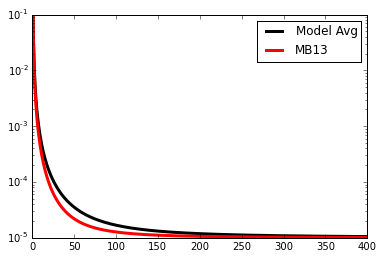

In [8]:
plt.plot(r, avg_dens, color = 'black', lw = 3,label='Model Avg')
plt.plot(r, n_MB13, color = 'red', lw=3, label='MB13')
plt.semilogy()
plt.ylim(1.0E-5,0.1)
plt.xlim(0.0,400.0)
plt.legend()
print "n at 200 kpc", n_profile(200), n_profile(200,n_amb=0.0)

In [6]:
#
#
# Randomly sample gas masses over some range and randomly sample some central densities over
# some range... keep it reasonable for now, but come up with something fancier later (i.e.
# range of M may change given n_o or vice versa).
#
# Then calculate the ram pressure stripping force required to strip
#
# Then pick a range of velocities, and calculate the number densities needed to strip at each
#
#
#


In [7]:
ndwarf   = 100000
mu_dwarf = 1.31
mu_halo  = 0.6


r_o = 10**(((np.log10(5000.0) - np.log10(300.0) ) * np.random.rand(ndwarf) + np.log10(300.0) )) * cgs.pc
M_o = 10**(((np.log10(100.0)  - np.log10(0.2)   ) * np.random.rand(ndwarf) + np.log10(0.2)   ) )*1.0E7 * cgs.Msun
n_o = 10**(((np.log10(50.)     - np.log10(0.01)  ) * np.random.rand(ndwarf) + np.log10(0.1)   ) ) # cm^-3
v   = 10**(((np.log10(500.)    - np.log10(100.)   ) * np.random.rand(ndwarf) + np.log10(100)   ) )* cgs.km


Pgal  = cgs.G * M_o * n_o * cgs.mp * mu_dwarf / (3.0 * r_o)
nhalo = Pgal / (v*v) / (cgs.mp * mu_halo)



In [8]:
r_strip = np.zeros(ndwarf)

rlow = 0.0
rup  = 1000.0

for i in np.arange(ndwarf):
    
    eqsolve = lambda r : nhalo[i] - n_profile(r)
    
    if np.sign(eqsolve(rlow)) == np.sign(eqsolve(rup)):
        r_strip[i] = 1.0E99
    else:
        r_strip[i] = optimize.brentq(eqsolve, 0.0, 1000.0) 
    

In [9]:
print r_strip

[  2.01992268e+00   2.42817096e+00   4.20703505e+00 ...,   1.00000000e+99
   1.00000000e+99   5.48019742e-01]


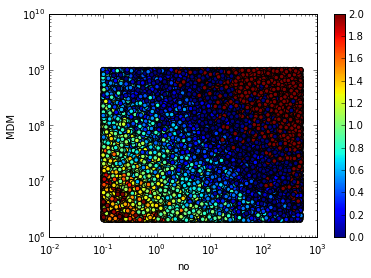

In [10]:
plt.scatter(n_o, M_o/cgs.Msun, c = np.log10(r_strip))
plt.colorbar()
plt.clim(0.0,2.0)
plt.loglog()
plt.xlabel('no')
plt.ylabel('MDM')

In [11]:
??pt.color_mesh_data??


In [ ]:
??pt.color_mesh_data

In [12]:
pt.color_mesh_data(np.log10(n_o), np.log

SyntaxError: unexpected EOF while parsing (<ipython-input-12-fc1ca7398aa4>, line 1)

In [ ]:
??pt.color_mesh

In [ ]:
plt.pcolormesh(xmesh,ymesh,H)
plt.colorbar()

In [ ]:
??pt.my_histogram2d